In [32]:
pip install fastf1


Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import fastf1 as ff1
import fastf1.plotting
from matplotlib.collections import LineCollection
import seaborn as sns


year = 2024
ses = 'Q'
wknd = 16
colormap = mpl.cm.plasma

fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')
session=ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '55', '44', '1', '11', '23', '27', '14', '3', '20', '10', '31', '22', '18', '43', '77', '24']


In [18]:

session.laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:12.142000,NOR,4,NaT,1.0,1.0,0 days 00:14:16.306000,NaT,NaT,0 days 00:00:37.116000,...,True,McLaren,0 days 00:14:16.306000,2024-08-31 14:03:14.075,1,NaN,False,,False,False
1,0 days 00:17:32.053000,NOR,4,0 days 00:01:19.911000,2.0,1.0,NaT,NaT,0 days 00:00:26.484000,0 days 00:00:26.898000,...,True,McLaren,0 days 00:16:12.142000,2024-08-31 14:05:09.911,1,NaN,False,,False,True
2,0 days 00:19:23.074000,NOR,4,0 days 00:01:51.021000,3.0,1.0,NaT,0 days 00:19:18.770000,0 days 00:00:32.371000,0 days 00:00:38.291000,...,True,McLaren,0 days 00:17:32.053000,2024-08-31 14:06:29.822,1,NaN,False,,False,False
3,0 days 00:43:29.375000,NOR,4,NaT,4.0,2.0,0 days 00:41:40.139000,NaT,NaT,0 days 00:00:39.008000,...,True,McLaren,0 days 00:19:23.074000,2024-08-31 14:08:20.843,12,NaN,False,,False,False
4,0 days 00:44:49.102000,NOR,4,0 days 00:01:19.727000,5.0,2.0,NaT,NaT,0 days 00:00:26.395000,0 days 00:00:26.865000,...,True,McLaren,0 days 00:43:29.375000,2024-08-31 14:32:27.144,1,NaN,False,,False,True


/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


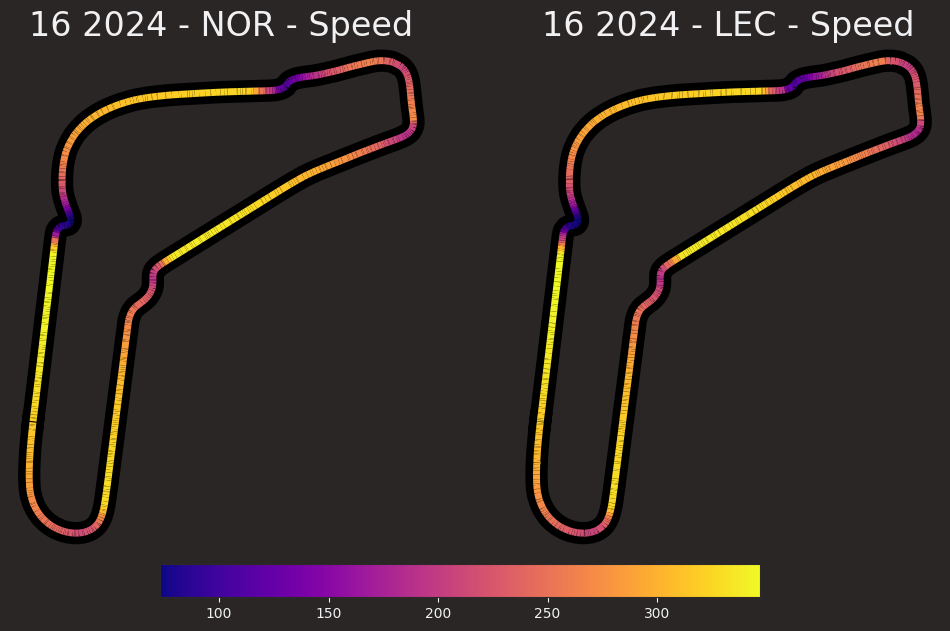

In [19]:
nor_lap = session.laps.pick_driver('NOR').pick_fastest()
lec_lap = session.laps.pick_driver('LEC').pick_fastest()

# Getting telemetry data
x = nor_lap.telemetry['X']           # values for x-axis
y = nor_lap.telemetry['Y']            # values for y-axis
color = nor_lap.telemetry['Speed']       # value to base color gradient on

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# plotting with title 
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6.75))
ax[0].set_title(f'{weekend.name} {year} - {"NOR"} - Speed', size=24, y=0.97)
ax[0].axis('off')

ax[0].plot(nor_lap.telemetry['X'], nor_lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Creating a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Setting the values used for colormapping
lc.set_array(color)

# Merging all line segments together
line = ax[0].add_collection(lc)

# creating a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

#repeating the steps for leclerc 
driver = 'LEC'

lap = session.laps.pick_driver('LEC').pick_fastest()


x = lec_lap.telemetry['X']            
y = lec_lap.telemetry['Y']         
color = lec_lap.telemetry['Speed']     

points2 = np.array([x, y]).T.reshape(-1, 1, 2)
segments2 = np.concatenate([points2[:-1], points2[1:]], axis=1)

ax[1].axis('off')
ax[1].set_title(f'{weekend.name} {year} - {"LEC"} - Speed', size=24, y=0.97)

ax[1].plot(nor_lap.telemetry['X'], nor_lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments2, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

lc.set_array(color)
line = ax[1].add_collection(lc)

plt.show()

We can hardly make out the difference between two drivers, as there was just 0.134 seconds difference between them.

So, now we will plot and compare both the drivers  the results directly.

/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


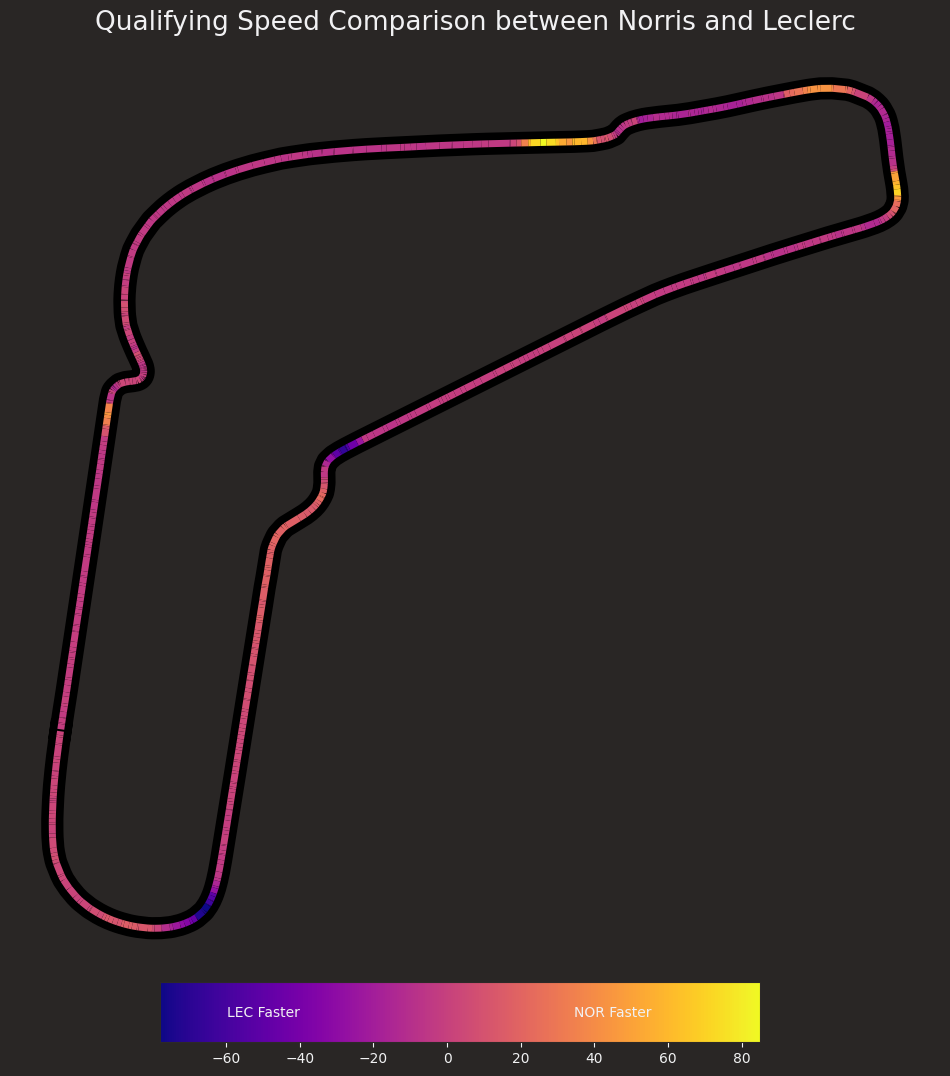

In [20]:
nor_lap = session.laps.pick_driver('NOR').pick_fastest()
lec_lap = session.laps.pick_driver('LEC').pick_fastest()

x = nor_lap.telemetry['X']           
y = nor_lap.telemetry['Y']            
color = nor_lap.telemetry['Speed'] - lec_lap.telemetry['Speed']      

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 12))
ax.set_title('Qualifying Speed Comparison between Norris and Leclerc')
ax.axis('off')

ax.plot(nor_lap.telemetry['X'], nor_lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

lc.set_array(color)

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

legend.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['LEC Faster','NOR Faster']):
    legend.ax.text((95*j-50), 0.5, lab, ha='center', va='center')
legend.ax.get_yaxis().labelpad = 15

plt.show()



The above graph makes comparison much easier. We can see that Charles was able to carry a lot more speed into the final corners, however, Lando appears to have made up for this by being faster in the straights. Based on this, It appears Lando drover the faster lap by being faster into the  turns in Sector 2, areas in which the Ferrari's should be faster.

events      WARNING 	Correcting user input 'Italy' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24'

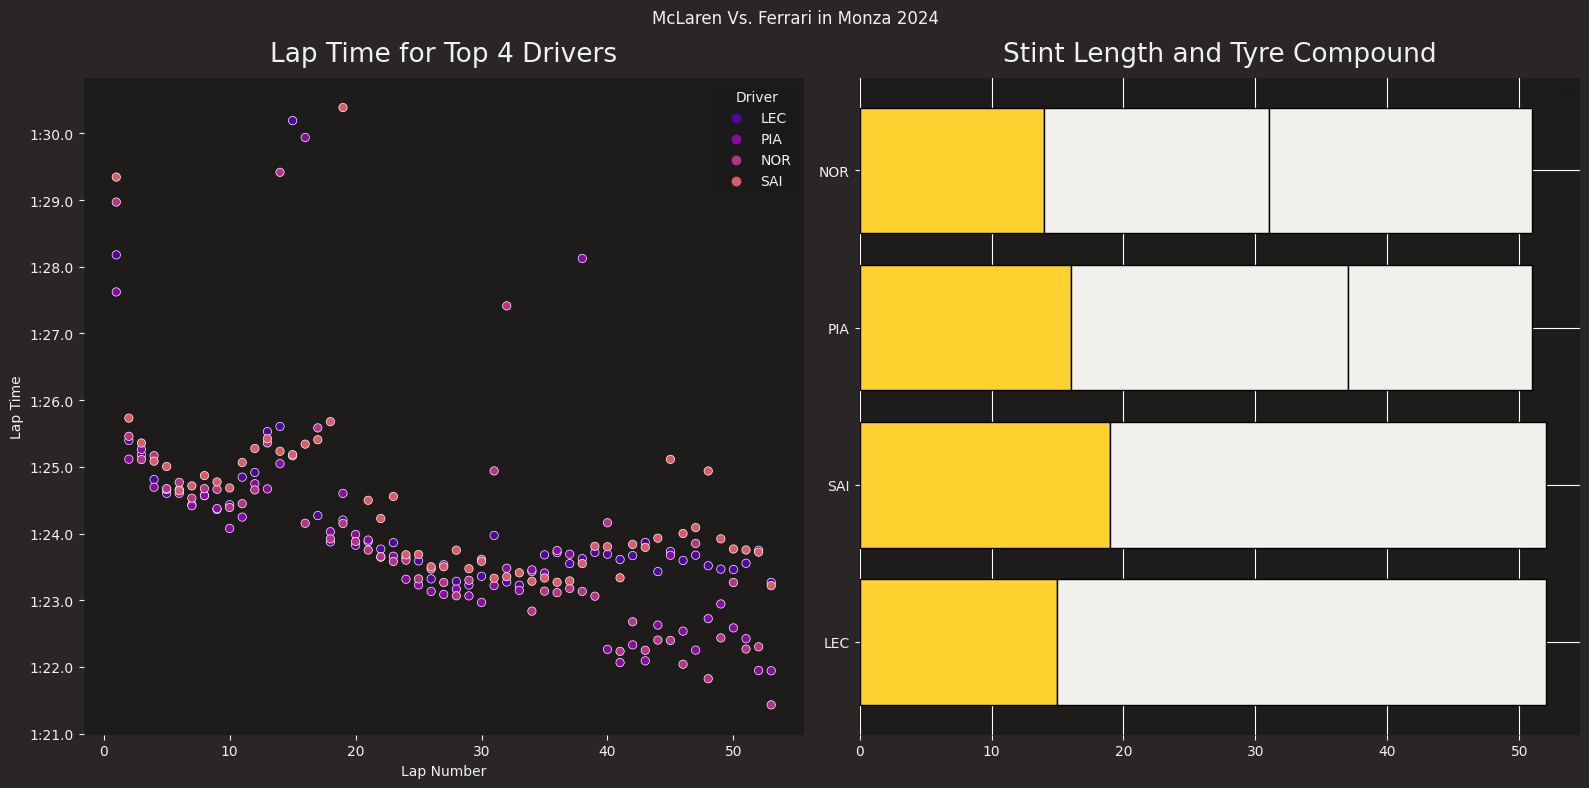

In [30]:
race = fastf1.get_session(2024, "Italy", 'R')
race.load()

laps = race.laps
laps=laps[(laps['Driver'] == 'LEC') | (laps['Driver'] == 'NOR') |(laps['Driver'] == 'PIA') |(laps['Driver'] == 'SAI')].dropna(subset = 'LapTime').reset_index(drop=True)
laps = laps[laps['LapTime'].dt.total_seconds()<95]

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(data=laps, x='LapNumber', y="LapTime", hue='Driver', palette = sns.color_palette("plasma"),ax=ax[0])

ax[0].set_xlabel("Lap Number")
ax[0].set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax[0].invert_yaxis()
plt.suptitle("McLaren Vs. Ferrari in Monza 2024")

#turning on major grid lines

plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

#tyre stratejeez
stints=laps[['Driver','Stint','Compound','LapNumber']]
stints= stints.groupby(['Driver','Stint','Compound'])
stints=stints.count().reset_index()
stints=stints.rename(columns={"LapNumber":"StintLength"})
drivers = laps ['Driver'].value_counts().index

for driver in drivers:
    driver_stints= stints.loc[stints["Driver"] == driver]
    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
# each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(y=driver, width=row['StintLength'], left = previous_stint_end, color = fastf1.plotting.COMPOUND_COLORS[row['Compound']],
                edgecolor='black', fill=True)
        previous_stint_end += row["StintLength"]

ax[0].set_title('Lap Time for Top 4 Drivers')
ax[1].set_title('Stint Length and Tyre Compound')
plt.legend()
plt.tight_layout()

plt.show()
        

